# Xuất thư viện và tải bộ dữ liệu

In [6]:
# Thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
# Bộ dữ liệu
df = pd.read_csv("C:/Users/NAM/Desktop/Học tập/Data Science talent Competition 2024/Vòng 2/Bảng ĐH_Vòng 2_DSTC 2024_Dataset/clean_data.csv")
df.shape

(17172, 111)

In [8]:
df.head()

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,...,ENQUIRIES_FOR_LOAN_9M_12M,ENQUIRIES_FOR_CC_3M_6M,ENQUIRIES_FOR_CC_3M_9M,ENQUIRIES_FOR_CC_3M_12M,ENQUIRIES_FOR_CC_6M_9M,ENQUIRIES_FOR_CC_6M_12M,ENQUIRIES_FOR_CC_9M_12M,OUTSTANDING_BAL_ALL_3M_9M,OUTSTANDING_BAL_LOAN_3M_9M,OUTSTANDING_BAL_CC_3M_9M
0,1639,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,-5.0,-5.0,-5.0,-5.0,0.0,0.000,0.000,0.000
1,15505,0,7.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0,...,0.0,-20.0,-25.0,-25.0,-5.0,-5.0,0.0,2.223,-10.000,50.000
2,20339,0,4.0,10.0,1.0,1.0,4.0,1.0,4.0,7.0,...,0.0,-25.0,-40.0,-40.0,-15.0,-15.0,0.0,1000877.778,-237.778,-185.000
3,9850,0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.667,240.000,6.667
4,14182,0,4.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000170.000,37.778,0.000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Columns: 111 entries, customer_id to OUTSTANDING_BAL_CC_3M_9M
dtypes: float64(109), int64(2)
memory usage: 14.5 MB


In [10]:
# Chia dataset thành 2 phần 'loan' và 'creditcard'
loan = []
for col in df.columns:
    if 'LOAN' in col:
        loan.append(col)
loan_df = df[loan]

cc = []
for col in df.columns:
    if 'CC' in col:
        cc.append(col)
cc_df = df[cc]

label_0 = df[df['label'] == 0]
label_1 = df[df['label'] == 1]

In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   NUMBER_OF_LOANS                      17172 non-null  float64
 1   NUMBER_OF_LOANS_BANK                 17172 non-null  float64
 2   NUMBER_OF_LOANS_NON_BANK             17172 non-null  float64
 3   NUM_NEW_LOAN_TAKEN_3M                17172 non-null  float64
 4   NUM_NEW_LOAN_TAKEN_6M                17172 non-null  float64
 5   NUM_NEW_LOAN_TAKEN_9M                17172 non-null  float64
 6   NUM_NEW_LOAN_TAKEN_12M               17172 non-null  float64
 7   OUTSTANDING_BAL_LOAN_CURRENT         17172 non-null  float64
 8   OUTSTANDING_BAL_LOAN_3M              17172 non-null  float64
 9   OUTSTANDING_BAL_LOAN_6M              17172 non-null  float64
 10  OUTSTANDING_BAL_LOAN_9M              17172 non-null  float64
 11  OUTSTANDING_BAL_LOAN_12M    

In [12]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OUTSTANDING_BAL_CC_3M              17172 non-null  float64
 1   OUTSTANDING_BAL_CC_6M              17172 non-null  float64
 2   OUTSTANDING_BAL_CC_9M              17172 non-null  float64
 3   OUTSTANDING_BAL_CC_12M             17172 non-null  float64
 4   OUTSTANDING_BAL_CC_3M_6M           17172 non-null  float64
 5   OUTSTANDING_BAL_CC_6M_9M           17172 non-null  float64
 6   OUTSTANDING_BAL_CC_9M_12M          17172 non-null  float64
 7   OUTSTANDING_BAL_CC_6M_12M          17172 non-null  float64
 8   OUTSTANDING_BAL_CC_3M_12M          17172 non-null  float64
 9   OUTSTANDING_BAL_CC_CURRENT         17172 non-null  float64
 10  ENQUIRIES_FOR_CC_3M                17172 non-null  float64
 11  ENQUIRIES_FROM_BANK_FOR_CC_3M      17172 non-null  flo

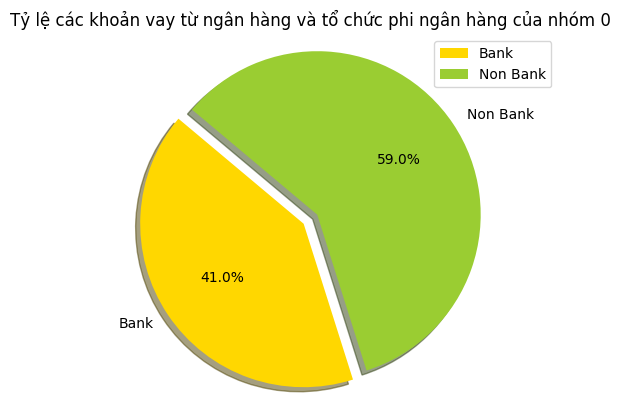

In [13]:
# Phân trăm khoản vay từ bank và non bank
labels = ['Bank', 'Non Bank']
size = [(label_0['NUMBER_OF_LOANS_BANK'].sum() / label_0['NUMBER_OF_LOANS'].sum())*100, (label_0['NUMBER_OF_LOANS_NON_BANK'].sum() / label_0['NUMBER_OF_LOANS'].sum())*100]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)
plt.pie(size, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend()
plt.title("Tỷ lệ các khoản vay từ ngân hàng và tổ chức phi ngân hàng của nhóm 0")
plt.axis('equal')
plt.show()

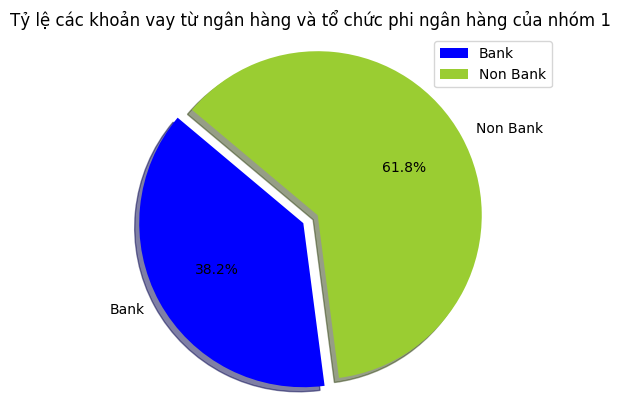

In [14]:
labels = ['Bank', 'Non Bank']
size = [(label_1['NUMBER_OF_LOANS_BANK'].sum() / label_1['NUMBER_OF_LOANS'].sum())*100, (label_1['NUMBER_OF_LOANS_NON_BANK'].sum() / label_1['NUMBER_OF_LOANS'].sum())*100]
colors = ['blue', 'yellowgreen']
explode = (0.1, 0)
plt.pie(size, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend()
plt.title("Tỷ lệ các khoản vay từ ngân hàng và tổ chức phi ngân hàng của nhóm 1")
plt.axis('equal')
plt.show()

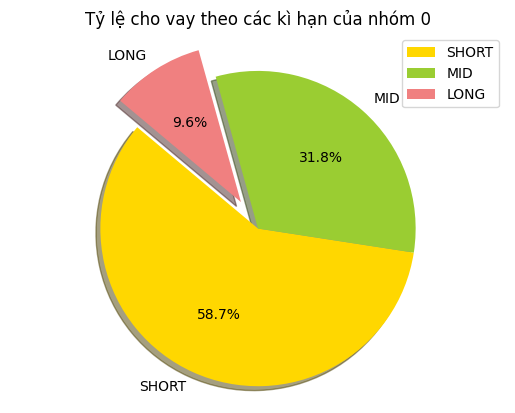

In [15]:
# Phần trăm các loại kì hạn khoản vay
labels_2 = ['SHORT', 'MID', 'LONG']
size_2 = [(label_0['SHORT_TERM_COUNT'].sum() / label_0['NUMBER_OF_LOANS'].sum())*100, (label_0['MID_TERM_COUNT'].sum() / label_0['NUMBER_OF_LOANS'].sum())*100, (label_0['LONG_TERM_COUNT'].sum() / label_0['NUMBER_OF_LOANS'].sum())*100]
colors_2 = ['gold', 'yellowgreen', 'lightcoral']
explode_2 = (0, 0, 0.2)
plt.pie(size_2, labels=labels_2, explode=explode_2, colors=colors_2, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend()
plt.title("Tỷ lệ cho vay theo các kì hạn của nhóm 0")
plt.axis('equal')
plt.show()

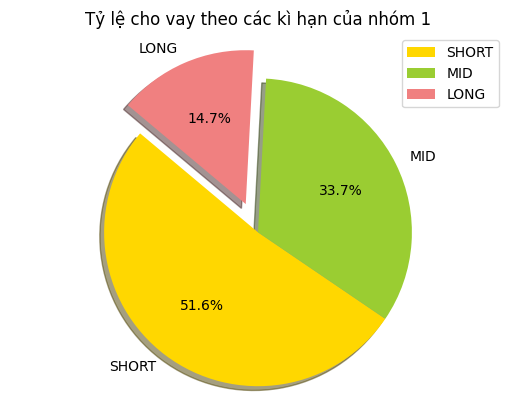

In [16]:
labels_2 = ['SHORT', 'MID', 'LONG']
size_2 = [(label_1['SHORT_TERM_COUNT'].sum() / label_1['NUMBER_OF_LOANS'].sum())*100, (label_1['MID_TERM_COUNT'].sum() / label_1['NUMBER_OF_LOANS'].sum())*100, (label_1['LONG_TERM_COUNT'].sum() / label_1['NUMBER_OF_LOANS'].sum())*100]
colors_2 = ['gold', 'yellowgreen', 'lightcoral']
explode_2 = (0, 0, 0.2)
plt.pie(size_2, labels=labels_2, explode=explode_2, colors=colors_2, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend()
plt.title("Tỷ lệ cho vay theo các kì hạn của nhóm 1")
plt.axis('equal')
plt.show()

In [17]:
df['label'].value_counts()

label
0    14023
1     3149
Name: count, dtype: int64

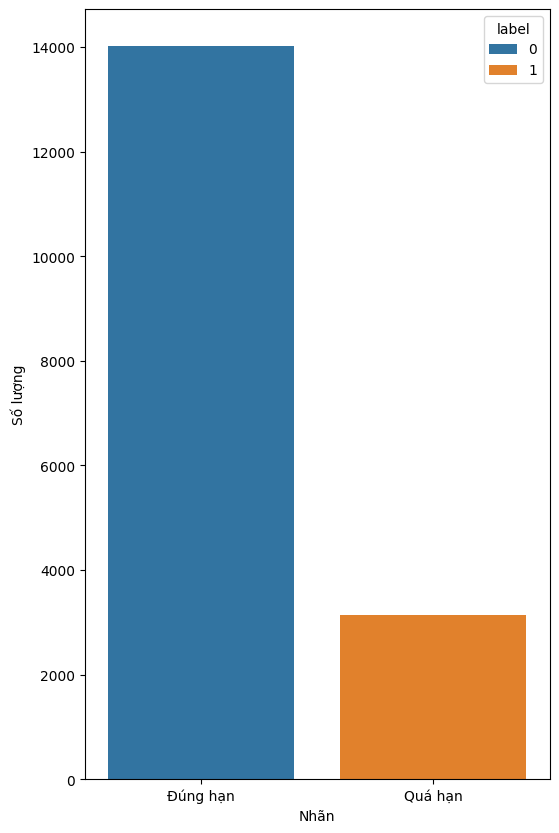

In [18]:
group_1 = df['label'].value_counts().reset_index(name='sum')
plt.figure(figsize=(6,10))
sns.barplot(data=group_1, y='sum', x='label', hue='label')
plt.xticks(labels=["Đúng hạn", "Quá hạn"], ticks= [0, 1])
plt.xlabel("Nhãn")
plt.ylabel("Số lượng")
plt.show()

In [19]:
# NPL Ratio
NPL = (label_1['OUTSTANDING_BAL_LOAN_CURRENT'].sum() / df['OUTSTANDING_BAL_LOAN_CURRENT'].sum()) * 100

In [20]:
NPL

18.3312564926133

In [21]:
print(label_1['NUMBER_OF_LOANS'].value_counts())
len(label_1)

NUMBER_OF_LOANS
1.0     1274
4.0      647
7.0      597
10.0     338
13.0     184
16.0      65
19.0      32
22.0       8
25.0       4
Name: count, dtype: int64


3149

In [22]:
label_1.loc[label_1['NUMBER_OF_LOANS'] == 1, 'NUMBER_OF_RELATIONSHIP'].mean()

1.9701726844583987

In [23]:
print(label_0['NUMBER_OF_LOANS'].value_counts())

NUMBER_OF_LOANS
7.0     4270
10.0    3177
4.0     2967
13.0    1938
16.0     976
19.0     432
22.0     175
25.0      65
28.0      12
31.0       5
1.0        4
34.0       2
Name: count, dtype: int64


In [24]:
df['NUMBER_OF_LOANS'].value_counts()

NUMBER_OF_LOANS
7.0     4867
4.0     3614
10.0    3515
13.0    2122
1.0     1278
16.0    1041
19.0     464
22.0     183
25.0      69
28.0      12
31.0       5
34.0       2
Name: count, dtype: int64

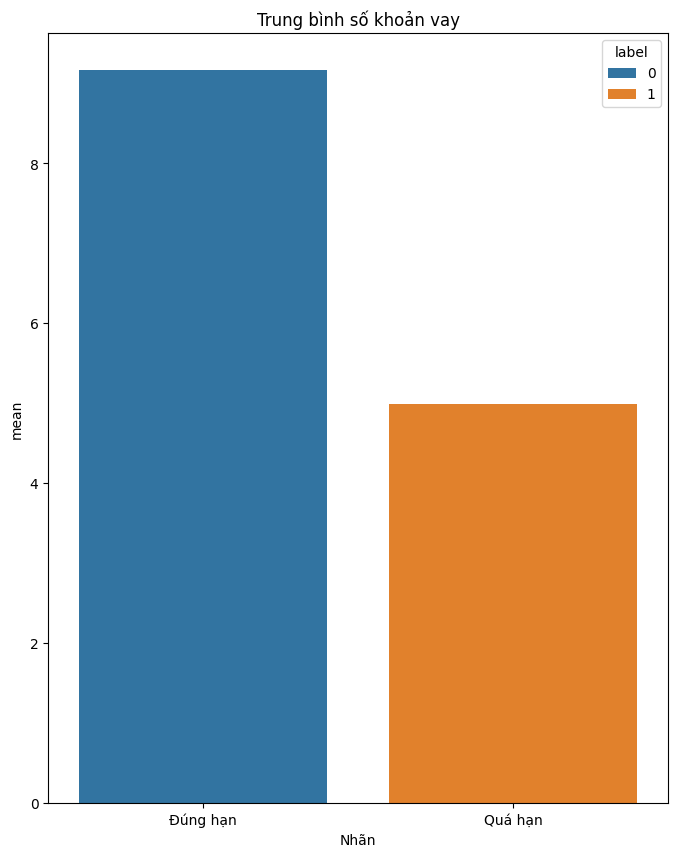

In [25]:
group_2 = df.groupby('label')['NUMBER_OF_LOANS'].mean().reset_index(name='mean')
plt.figure(figsize=(8,10))
sns.barplot(data=group_2, y='mean', x='label', hue='label')
plt.xticks(labels=["Đúng hạn", "Quá hạn"], ticks= [0, 1])
plt.xlabel("Nhãn")
plt.title("Trung bình số khoản vay")
plt.show()

In [26]:
group_2 = df.groupby('label')[['NUMBER_OF_RELATIONSHIP_BANK', 'NUMBER_OF_RELATIONSHIP_NON_BANK']].mean().reset_index()
group_2

,label,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK
0,0,7.641161,7.266134
1,1,3.444586,4.625913


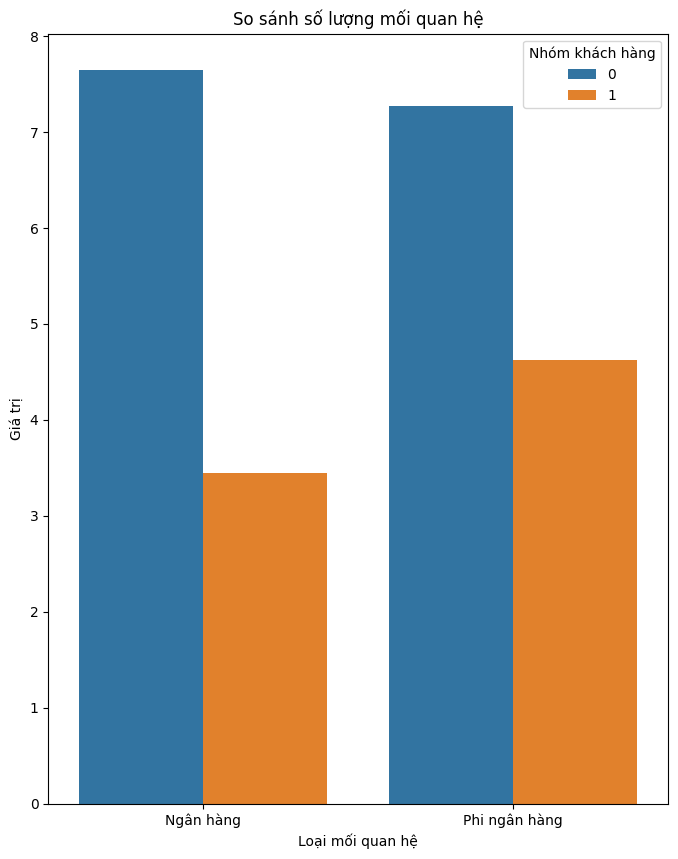

In [27]:
group_2 = df.groupby('label')[['NUMBER_OF_RELATIONSHIP_BANK', 'NUMBER_OF_RELATIONSHIP_NON_BANK']].mean().reset_index()
group_2_melted = group_2.melt(id_vars='label', var_name='Relationship_Type', value_name='Value')
plt.figure(figsize=(8,10))
sns.barplot(data=group_2_melted, y='Value', x='Relationship_Type', hue='label')
plt.title('So sánh số lượng mối quan hệ')
plt.xlabel('Loại mối quan hệ')
plt.ylabel('Giá trị')
plt.xticks(ticks=[0,1], labels=['Ngân hàng', 'Phi ngân hàng'])
plt.legend(title='Nhóm khách hàng')
plt.show()